In [96]:
import pandas as pd
import numpy as np

In [97]:
data = pd.DataFrame()
candy_path=(r'Candy_Data.csv')
candy_data = pd.read_csv(candy_path)

In [76]:
candy_data.head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [148]:
candy_data[['sugarpercent','pricepercent','winpercent']].describe()

,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000
mean,0.478647,0.468882,50.316764
std,0.282778,0.285740,14.714357
min,0.011000,0.011000,22.445341
25%,0.220000,0.255000,39.141056
50%,0.465000,0.465000,47.829754
75%,0.732000,0.651000,59.863998
max,0.988000,0.976000,84.180290


In [77]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [ ]:
output_file('my_first_graph.html')

x = [1, 3, 5, 7]
y = [2, 4, 6, 8]

p = figure()

p.circle(x, y, size=10, color='red', legend='circle')
p.line(x, y, color='blue', legend='line')
p.triangle(y, x, color='gold', size=10, legend='triangle')

p.legend.click_policy='hide'

In [ ]:
show(p)

In [8]:
candy_data.columns.tolist()

['competitorname',
 'chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent',
 'winpercent']

In [78]:
source = ColumnDataSource(candy_data)

output_file('my_first_lidl_graph.html')

p = figure(x_range=candy_data.competitorname, y_range=(10,90), plot_width=1550, plot_height=700)
p.xaxis.major_label_orientation = np.pi/4
p.vbar(x='competitorname', top='winpercent' , width=0.5, source = source, color = 'blue')
#p.circle(source=source, size=10, color='green', legend='circle')
#p.line(x, y, color='blue', legend='line')

p.legend.click_policy='hide'

In [70]:
source = ColumnDataSource(candy_data)

output_file('my_second_lidl_graph.html')

p = figure(x_range=(0,1), y_range=(0,1), plot_width=1550, plot_height=700)
p.xaxis.major_label_orientation = np.pi/4
p.vbar(x='pricepercent', top='sugarpercent' , width=0.5, source = source, color = 'blue')
#p.circle(source=source, size=10, color='green', legend='circle')
#p.line(x, y, color='blue', legend='line')

p.legend.click_policy='hide'

In [79]:
p.title.text = 'Competitor Name vs Win Percent'
p.xaxis.axis_label = 'Competitor Name'
p.yaxis.axis_label = 'Win Precentage'

In [80]:
hover = HoverTool()
hover.tooltips=[
    ('Competitor Name', '@competitorname'),
    ('Sugar Percent','@sugarpercent'),
    ('Price Percent','@pricepercent'),
    ('Win Percent','@winpercent')
]

p.add_tools(hover)

In [81]:
show(p)

In [6]:
import matplotlib.pyplot as plt

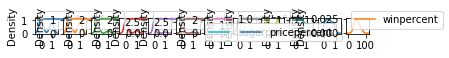

In [11]:
candy_data.plot(kind='density', subplots=True, layout=(12,50), sharex=False)
plt.show()

In [50]:
import seaborn as sns

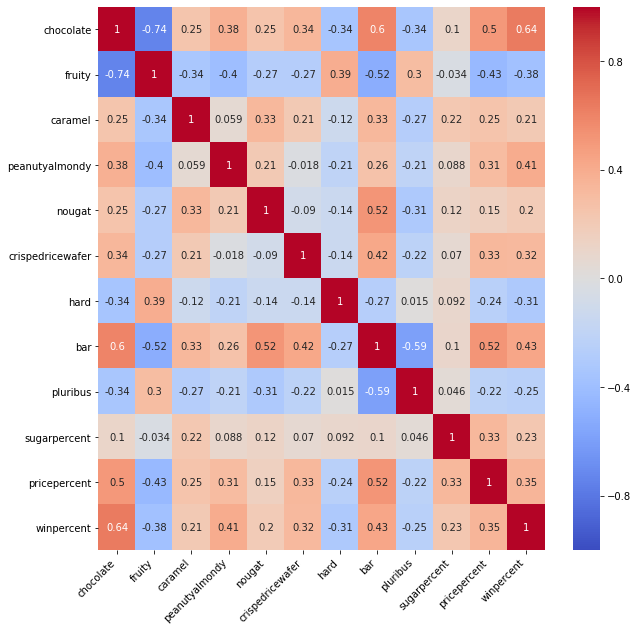

In [51]:
#corr = candy_data.corr()
'''ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)'''
plt.figure(figsize=(10,10))
ax = sns.heatmap(candy_data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

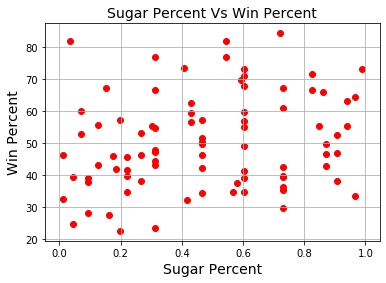

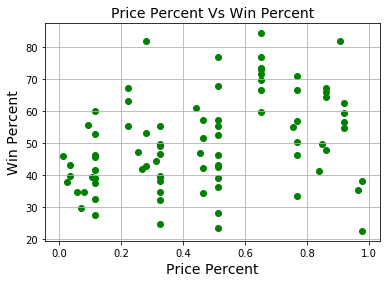

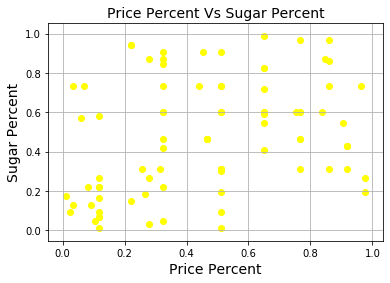

In [20]:
plt.scatter(candy_data['sugarpercent'], candy_data['winpercent'], color='red')
plt.title('Sugar Percent Vs Win Percent', fontsize=14)
plt.xlabel('Sugar Percent', fontsize=14)
plt.ylabel('Win Percent', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(candy_data['pricepercent'], candy_data['winpercent'], color='green')
plt.title('Price Percent Vs Win Percent', fontsize=14)
plt.xlabel('Price Percent', fontsize=14)
plt.ylabel('Win Percent', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(candy_data['pricepercent'], candy_data['sugarpercent'], color='yellow')
plt.title('Price Percent Vs Sugar Percent', fontsize=14)
plt.xlabel('Price Percent', fontsize=14)
plt.ylabel('Sugar Percent', fontsize=14)
plt.grid(True)
plt.show()

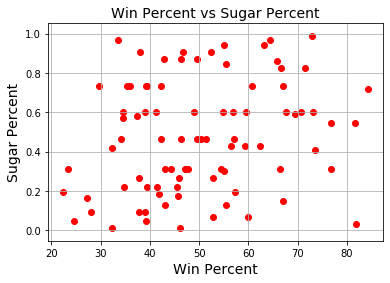

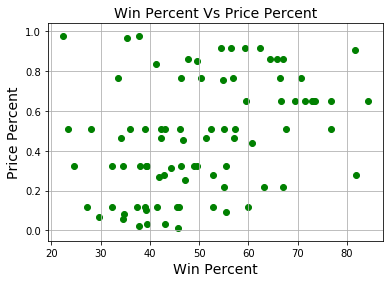

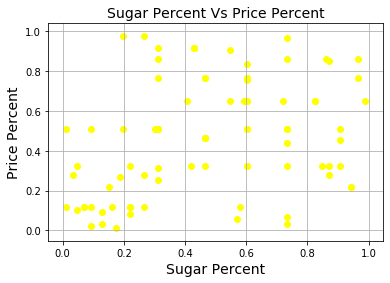

In [21]:
plt.scatter(candy_data['winpercent'], candy_data['sugarpercent'], color='red')
plt.title('Win Percent vs Sugar Percent', fontsize=14)
plt.ylabel('Sugar Percent', fontsize=14)
plt.xlabel('Win Percent', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(candy_data['winpercent'], candy_data['pricepercent'], color='green')
plt.title('Win Percent Vs Price Percent', fontsize=14)
plt.ylabel('Price Percent', fontsize=14)
plt.xlabel('Win Percent', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(candy_data['sugarpercent'], candy_data['pricepercent'], color='yellow')
plt.title('Sugar Percent Vs Price Percent', fontsize=14)
plt.ylabel('Price Percent', fontsize=14)
plt.xlabel('Sugar Percent', fontsize=14)
plt.grid(True)
plt.show()

In [52]:
from sklearn import linear_model
import tkinter as tk 
import statsmodels.api as sm

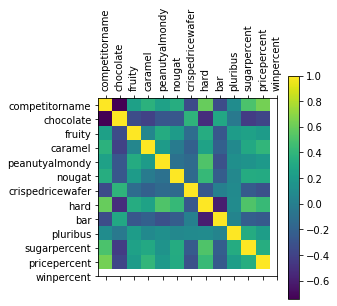

In [34]:
import matplotlib.pyplot as plt

plt.matshow(candy_data.corr())
plt.xticks(np.arange(13), candy_data.columns, rotation=90)
plt.yticks(np.arange(13), candy_data.columns, rotation=0)
plt.colorbar()
plt.show()

In [55]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
X = candy_data[['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent']]
Y = candy_data[['winpercent']]

In [64]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
'''Chocolate = 1
Fruity = 0
Caramel = 0
Peanut_and_Almond = 1
Nougat = 0
Crisped_Rice_Wafer = 0
Hard = 1
Bar = 0
Pluribus = 0'''
Sugar_Percent = 0.80
Price_Percent = 0.70
#Chocolate, Fruity, Caramel, Peanut_and_Almond, Nougat, Crisped_Rice_Wafer, Hard, Bar, Pluribus, 
print ('Predicted Win Percent: \n', regr.predict([[Sugar_Percent, Price_Percent]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [34.53397841]
Coefficients: 
 [[ 0.         19.74806698  9.42232207  2.22448136 10.07068847  0.8043306
   8.91896981 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]]


ValueError: shapes (1,2) and (12,1) not aligned: 2 (dim 1) != 12 (dim 0)

In [61]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

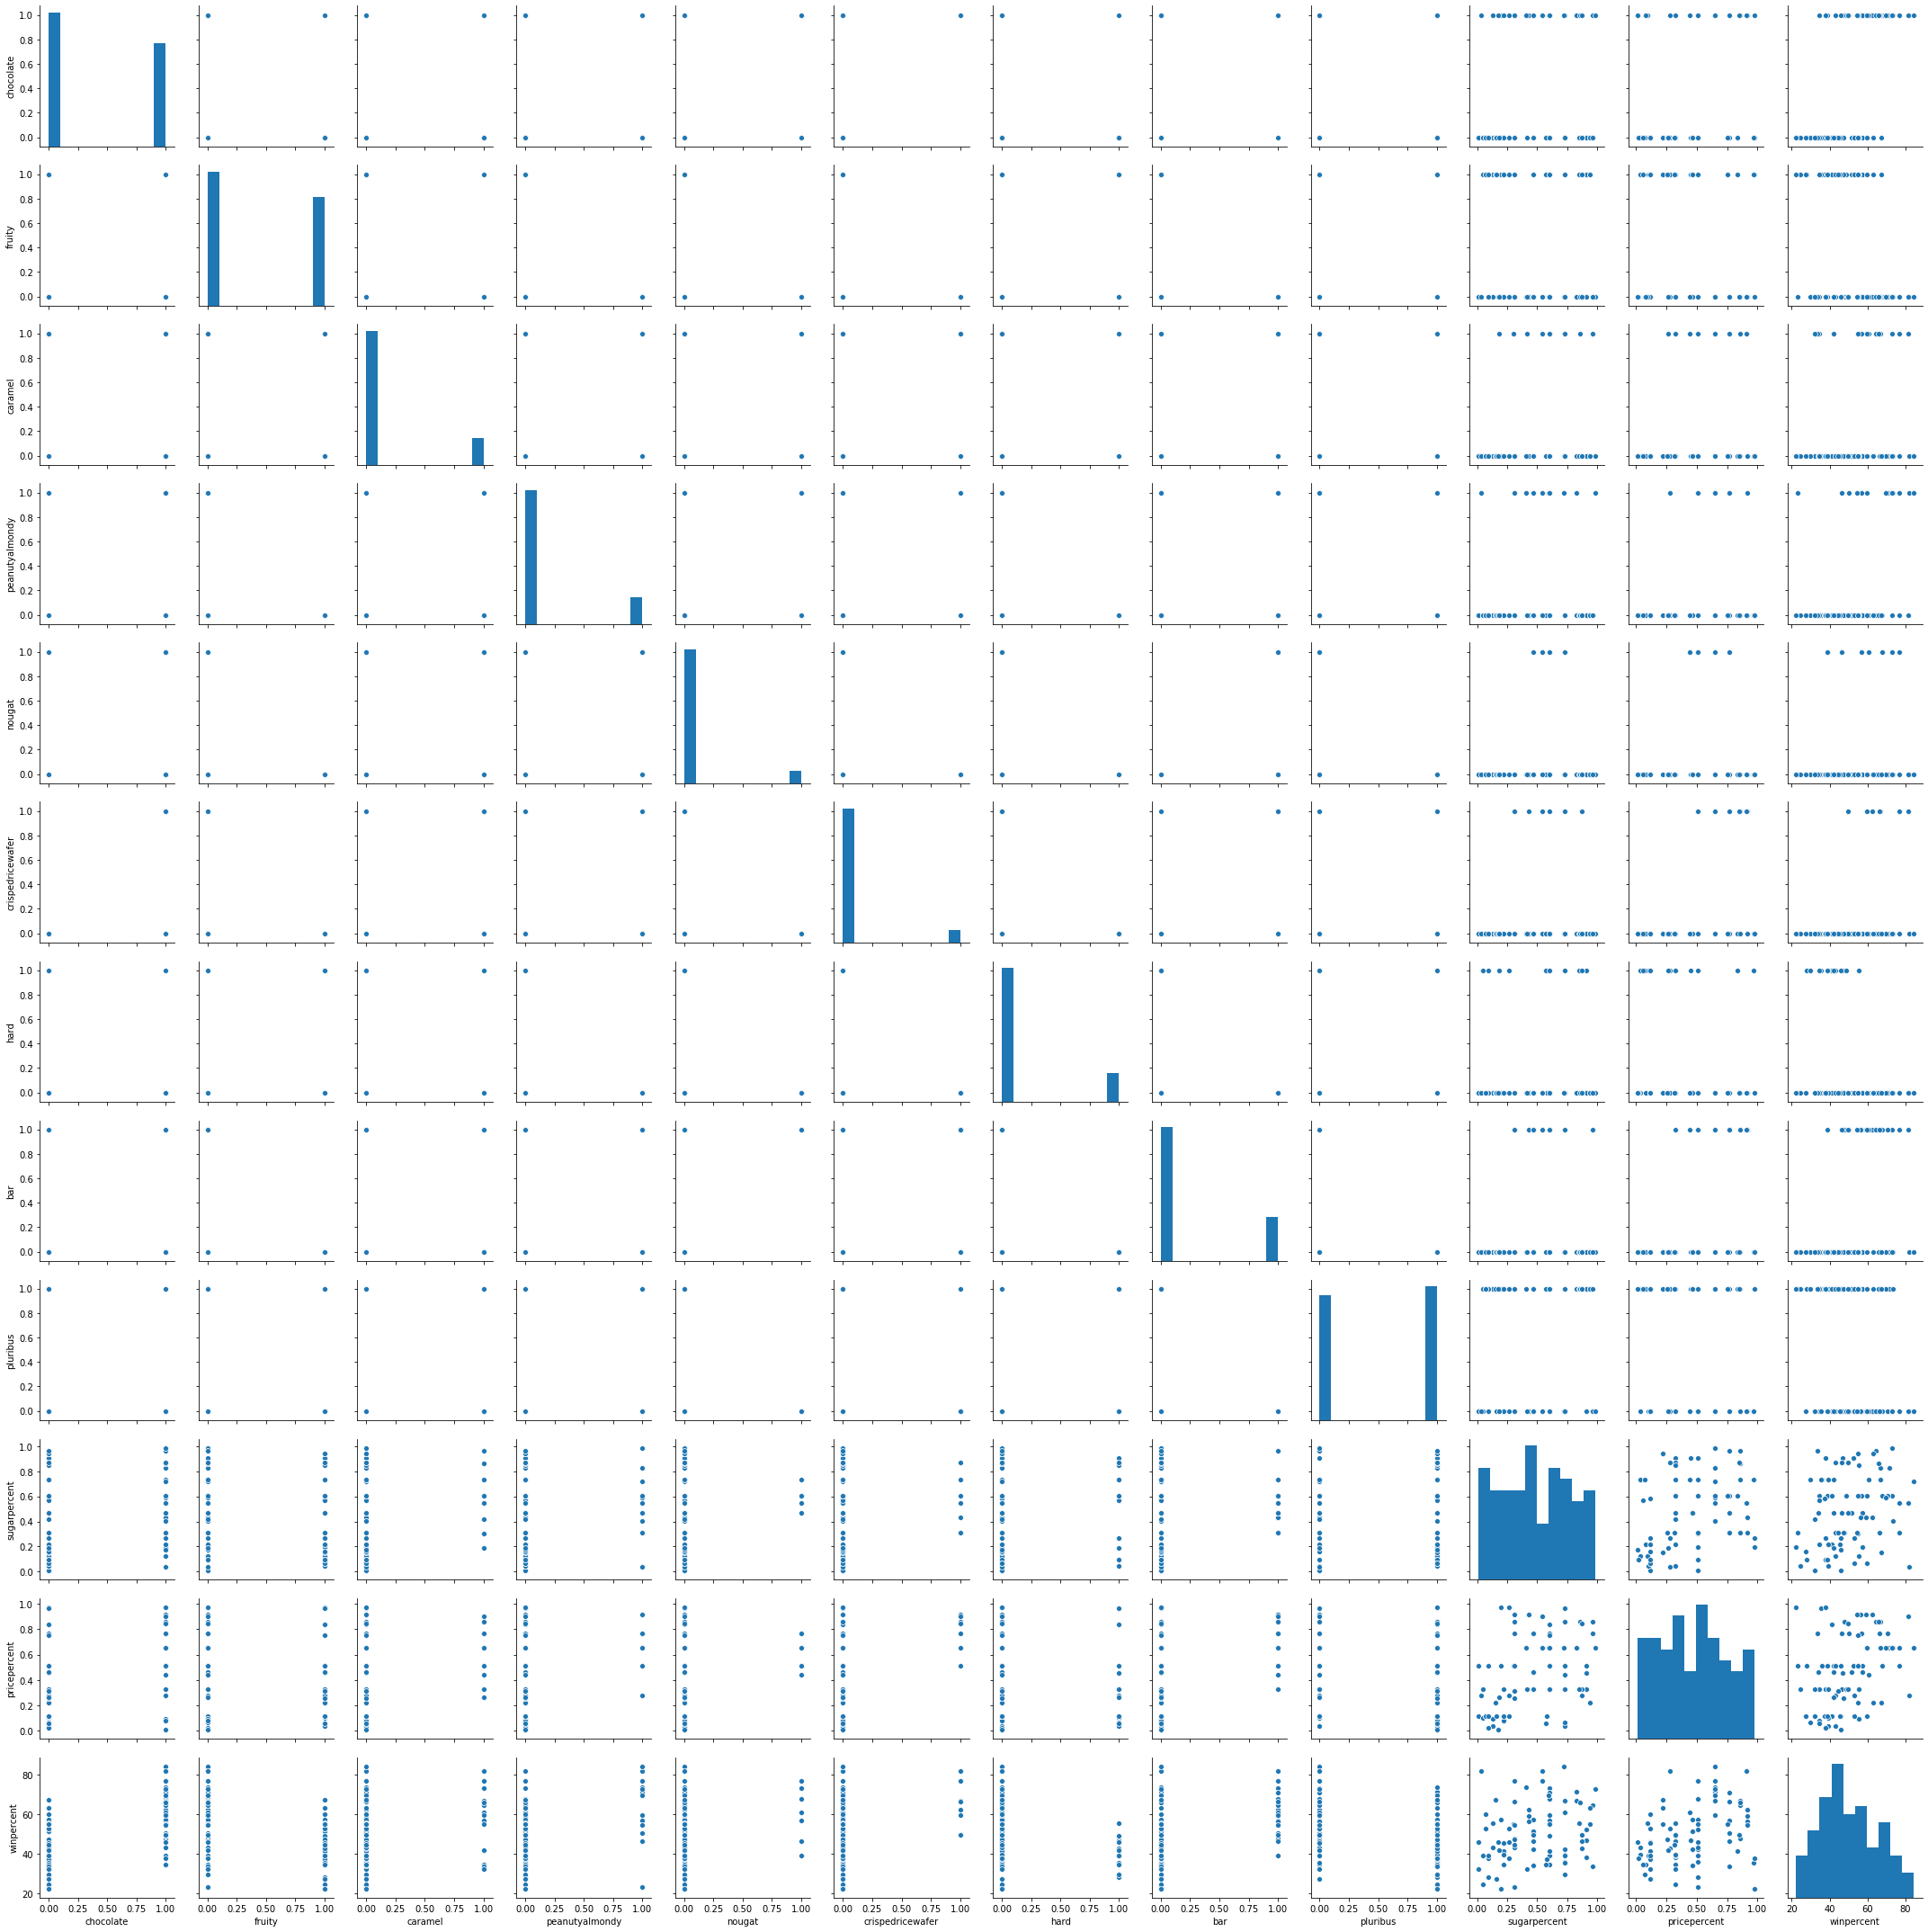

In [83]:
sns.pairplot(candy_data)

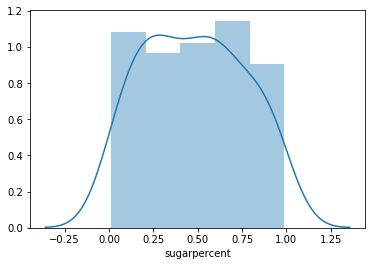

In [85]:
sns.distplot(candy_data['sugarpercent'])

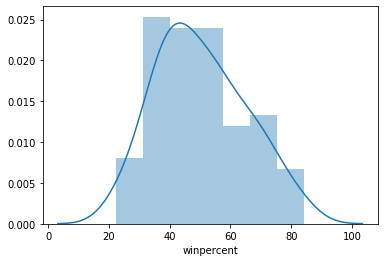

In [110]:
sns.distplot(candy_data['winpercent'])

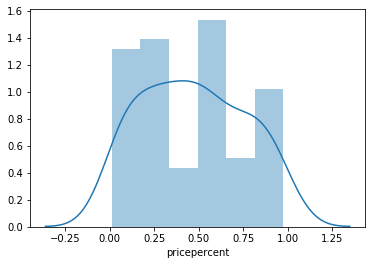

In [111]:
sns.distplot(candy_data['pricepercent'])

In [86]:
candy_data.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


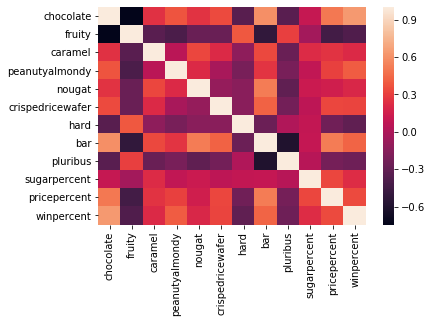

In [112]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [98]:
X = candy_data[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent']]
y = candy_data['winpercent']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [100]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
X_new = ['1','0','0','1','0','0','0','1','0','.89','.70']
X_pred = np.reshape(X_new, (1, -1))

In [106]:
predictions = lm.predict(X_pred)

C:\Users\Gaurang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

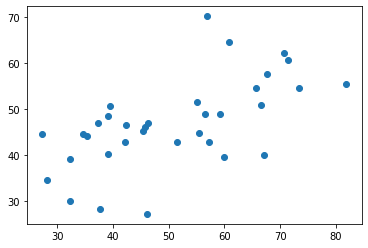

In [107]:
plt.scatter(y_test,predictions)

In [145]:
import sys
!{sys.executable} -m pip install chart_studio.plotly

  ERROR: Could not find a version that satisfies the requirement chart_studio.plotly (from versions: none)
ERROR: No matching distribution found for chart_studio.plotly
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [144]:
import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [141]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)
line = slope*y_test+intercept

plt.plot(y_test,predictions,'o', y_test, line)
pylab.title('Linear Fit with Matplotlib')
ax = plt.gca()
ax.set_axis_bgcolor((0.898, 0.898, 0.898))
fig = plt.gcf()
py.plot_mpl(fig, filename='linear-Fit-with-matplotlib')

NameError: name 'stats' is not defined

ValueError: x and y must have same first dimension, but have shapes (85, 11) and (34,)

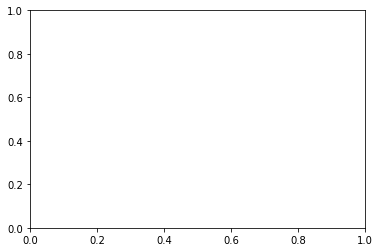

In [95]:
plt.scatter(X,y)
plt.plot(X, predictions, color='red')
plt.show()

In [93]:
#chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent'
X_predict = ['1','0','0','1','0','0','0','1','0','.89','.70']  # put the dates of which you want to predict kwh here
y_predict = lm.predict(X_predict)

ValueError: Expected 2D array, got 1D array instead:
array=['1' '0' '0' '1' '0' '0' '0' '1' '0' '.89' '.70'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [115]:
sort_by_winpercent = candy_data.sort_values('winpercent',ascending=False)
sort_by_winpercent.head(n=10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [118]:
sort_by_pricepercent = candy_data.sort_values('pricepercent',ascending=True)
sort_by_pricepercent.head(n=10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
30,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
63,Smarties candy,0,1,0,0,0,0,1,0,1,0.267,0.116,45.995827


In [116]:
winp_pricep_sort = candy_data.sort_values(['winpercent', 'pricepercent'], ascending=[False, True])
winp_pricep_sort.head(n=10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [140]:
winp_pricep_sort = candy_data.sort_values(['pricepercent','winpercent'], ascending=[True, False])
winp_pricep_sort.head(n=10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
76,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556
69,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
59,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
30,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998


In [138]:
new_X = [['1','0','0','1','0','0','0','1','0','0.89','0.70']]
#new_X = np.float64
new_X = np.reshape(new_X, (-1, 1))
print(new_X)

[['1']
 ['0']
 ['0']
 ['1']
 ['0']
 ['0']
 ['0']
 ['1']
 ['0']
 ['0.89']
 ['0.70']]


In [139]:
lm.predict({"winpercent": new_X})
#{"winpercent": new_X}

ValueError: Expected 2D array, got scalar array instead:
array={'winpercent': array([['1'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0'],
       ['0'],
       ['1'],
       ['0'],
       ['0.89'],
       ['0.70']], dtype='<U4')}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [149]:
print(lm.predict([[1, 0, 0, 1, 1, 0, 0, 1, 0, .80, .40]]))

[70.82304663]


In [155]:
#chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent'
print(lm.predict([[1,0,1,1,0,1,0,1,0,0.89,0.80]]))

[82.79164522]
